
<h1 style="text-align: center;">CIÊNCIA DE DADOS</h1>
<h1 style="text-align: center;">Roteiro de Atividade Prática</h1>
<br>
<br>

Nome: ______________________________________________________________________________________      

Turma: ______________


**Componente:** Matemática e Estatística para Ciência de Dados 
<br>
**Unidade Curricular:** Estatística Aplicada
<br>
**Tema da Semana:** Inferência Estatística: Intervalos de Confiança I
<br>


# NOTEBOOK DO PROFESSOR

### Aula 1

#### Exemplo 1

    - Intervalo de Confiança para a Média com variância conhecida (Distribuição Normal)

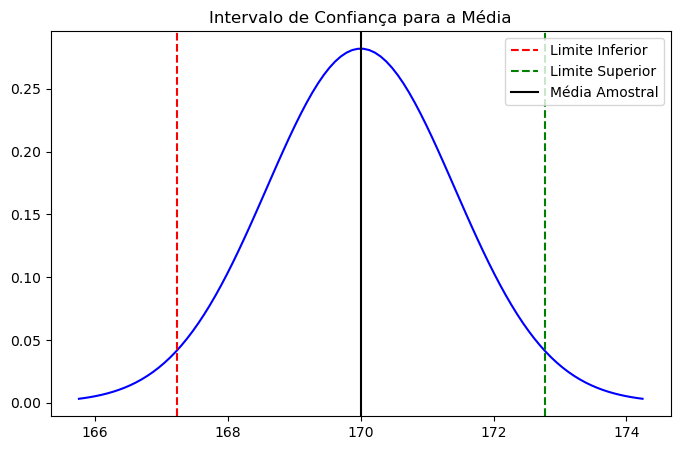

Intervalo de Confiança: (167.23, 172.77)


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Dados
media_amostral = 170  # Exemplo: altura média em cm
sigma = 10  # Desvio padrão populacional
n = 50  # Tamanho da amostra

# Nível de confiança de 95%
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = sigma / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Visualização gráfica
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)

plt.figure(figsize=(8,5))
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para a Média")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas para o Exemplo 1 (Distribuição Normal)**
1. O que representa o intervalo de confiança obtido no exemplo e como podemos interpretá-lo em relação à média populacional?
   - **Resposta:** O intervalo de confiança indica que, com 95% de certeza, o verdadeiro valor da média populacional está dentro dos limites calculados. Isso significa que, se repetíssemos o experimento diversas vezes, em 95% das amostras coletadas o intervalo conteria a média real.

2. Como o tamanho da amostra (n) afeta o intervalo de confiança? O que aconteceria se aumentássemos o tamanho da amostra para 100?
   - **Resposta:** O tamanho da amostra está no denominador da equação do erro padrão, ou seja, um aumento de \( n \) reduz a margem de erro e, consequentemente, o intervalo de confiança se torna mais estreito. Se \( n \) aumentasse para 100, o erro padrão diminuiria e o intervalo seria mais preciso.

3. Se o nível de confiança fosse aumentado para 99%, como isso afetaria o intervalo de confiança?
   - **Resposta:** Um nível de confiança maior implica um valor crítico \( z \) maior, o que resulta em um intervalo de confiança mais amplo. Isso significa que estaríamos aumentando a certeza de que o verdadeiro valor da média populacional está no intervalo, mas ao custo de uma margem de erro maior.

---


#### Exemplo 2

    - Intervalo de Confiança para a Média com variância desconhecida (Distribuição t-Student)

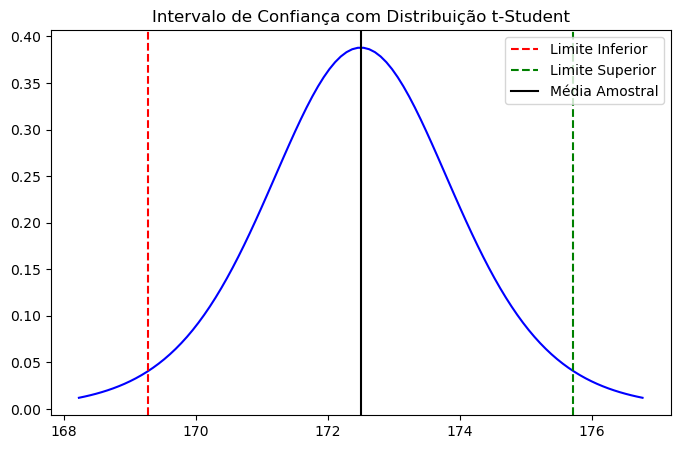

Intervalo de Confiança: (169.28, 175.72)


In [9]:
# Dados
amostra = [168, 172, 177, 165, 180, 169, 174, 171, 176, 173]  # Alturas em cm
n = len(amostra)
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)  # ddof=1 para amostra

# Nível de confiança de 95%
confianca = 0.95
t = stats.t.ppf((1 + confianca) / 2, df=n-1)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_amostral / np.sqrt(n)
limite_inferior = media_amostral - t * erro_padrao
limite_superior = media_amostral + t * erro_padrao

# Visualização gráfica
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.t.pdf((x - media_amostral) / erro_padrao, df=n-1)

plt.figure(figsize=(8,5))
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança com Distribuição t-Student")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")


#### **Perguntas para o Exemplo 2 (Distribuição t-Student)**
1. Por que utilizamos a distribuição t-Student nesse caso, ao invés da normal?
   - **Resposta:** A distribuição t-Student é usada quando o tamanho da amostra é pequeno (n < 30) e a variância populacional é desconhecida. Ela é mais apropriada nesses casos porque ajusta a incerteza adicional devido ao tamanho reduzido da amostra.

2. Como a variação dentro da amostra influencia o intervalo de confiança obtido?
   - **Resposta:** Se houver grande variação entre os valores da amostra, o desvio padrão amostral será maior, o que aumentará o erro padrão. Isso resultará em um intervalo de confiança mais amplo, refletindo maior incerteza na estimativa da média populacional.

3. Se tivéssemos coletado mais observações, como o intervalo de confiança mudaria?
   - **Resposta:** Um aumento no tamanho da amostra reduziria o erro padrão, estreitando o intervalo de confiança. Isso indicaria uma estimativa mais precisa da média populacional.

---

#### Reflexões sobre a aula 1:

1. **A importância da incerteza na estatística:**  
   "Hoje aprendemos que, ao analisar dados, sempre há um nível de incerteza. O intervalo de confiança nos ajuda a quantificar essa incerteza e fazer estimativas mais precisas sobre uma população a partir de uma amostra."

2. **O impacto do tamanho da amostra:**  
   "Percebemos que quanto maior a amostra, mais estreito fica o intervalo de confiança, tornando nossa estimativa mais precisa. Isso nos mostra a importância de coletar dados suficientes para tirar conclusões mais confiáveis."

3. **Tomada de decisão baseada em dados:**  
   "Os intervalos de confiança são muito usados em diversas áreas, como pesquisas eleitorais, controle de qualidade e estudos científicos. Pensando nisso, como podemos utilizar essa ferramenta para tomar melhores decisões no dia a dia?"

4. **Interpretação dos resultados:**  
   "Um intervalo de confiança de 95% não significa que há 95% de chance de o verdadeiro valor estar dentro do intervalo, mas sim que, se repetíssemos a coleta de dados várias vezes, 95% das amostras conteriam o valor real. Isso reforça a ideia de que estatística lida com probabilidades, não certezas absolutas."

5. **Visualizando os dados:**  
   "Os gráficos que geramos hoje nos ajudaram a ver a distribuição dos valores e a incerteza do intervalo de confiança. Como vocês acham que a visualização pode impactar a interpretação dos dados em outras situações?"

---

### Aula 2

#### **Exemplo 1: Estimando a Média de Vendas Mensais**

Uma loja deseja estimar a média mensal de vendas de um produto. Com base em 40 meses de dados, a média observada foi de 500 unidades vendidas, com um desvio padrão populacional de 50 unidades. Calcule um intervalo de confiança de 95% para a média real de vendas.

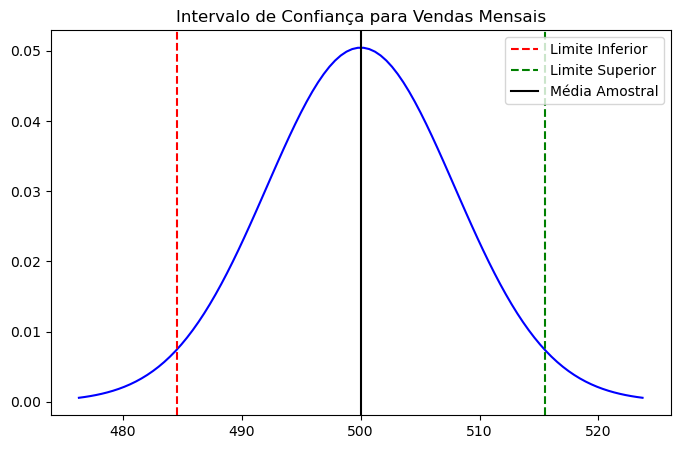

Intervalo de Confiança: (484.51, 515.49)


In [20]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Dados
media_amostral = 500
sigma = 50
n = 40
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = sigma / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Vendas Mensais")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas:**

1. **Como interpretar esse intervalo de confiança no contexto do problema?**

    - **Resposta:** Há 95% de chance de que a verdadeira média mensal de vendas esteja dentro do intervalo calculado.

2. **O que aconteceria com o intervalo se coletássemos mais meses de dados?**

    - **Resposta:** O intervalo ficaria mais estreito, indicando uma estimativa mais precisa da média real.

---

#### **Exemplo 2: Tempo Médio de Atendimento em um Hospital**

Um hospital deseja saber quanto tempo, em média, um paciente espera para ser atendido. Uma amostra de 25 pacientes revelou uma média de 30 minutos com um desvio padrão amostral de 8 minutos. Determine um intervalo de confiança de 95% para o tempo médio de espera.

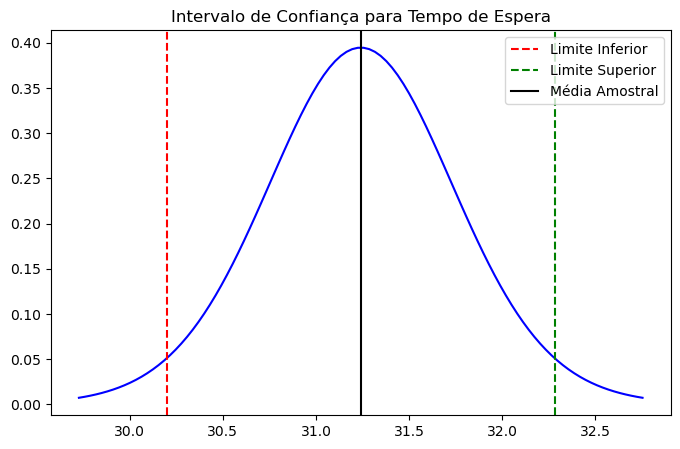

Intervalo de Confiança: (30.20, 32.28)


In [25]:
#Dados
amostra = [30, 32, 28, 35, 31, 29, 34, 36, 30, 32, 33, 31, 28, 29, 34, 30, 27, 32, 30, 31, 33, 28, 29, 35, 34]
n = len(amostra)
media_amostral = np.mean(amostra)
desvio_amostral = np.std(amostra, ddof=1)
confianca = 0.95
t = stats.t.ppf((1 + confianca) / 2, df=n-1)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_amostral / np.sqrt(n)
limite_inferior = media_amostral - t * erro_padrao
limite_superior = media_amostral + t * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(media_amostral - 3*erro_padrao, media_amostral + 3*erro_padrao, 100)
y = stats.t.pdf((x - media_amostral) / erro_padrao, df=n-1)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Tempo de Espera")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas:**

1. **Por que utilizamos a distribuição t-Student neste caso?**

    - Resposta: Porque o tamanho da amostra é pequeno (n < 30) e a variância populacional é desconhecida.

2. **Como o desvio padrão da amostra afeta o intervalo de confiança?**

    - Resposta: Quanto maior o desvio padrão, maior a incerteza, resultando em um intervalo mais amplo.
---

#### **Exemplo 3: Intervalo de Confiança Usando SciPy**

O Python possui funções prontas para calcular intervalos de confiança, facilitando a análise de dados. Vamos estimar um intervalo de confiança para a média de um conjunto de dados fictício.

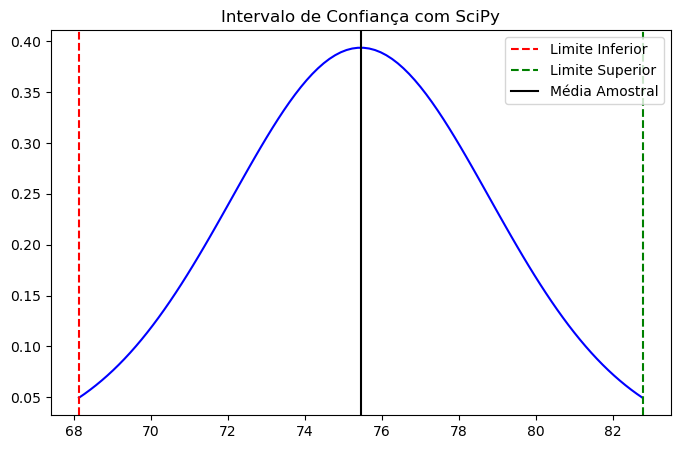

Intervalo de Confiança: (68.13, 82.77)


In [28]:
def intervalo_confianca(amostra, confianca=0.95):
    n = len(amostra)
    media = np.mean(amostra)
    desvio = np.std(amostra, ddof=1)
    t = stats.t.ppf((1 + confianca) / 2, df=n-1)
    erro_padrao = desvio / np.sqrt(n)
    return media - t * erro_padrao, media + t * erro_padrao

# Exemplo
dados = np.random.randint(50, 100, 20)
lim_inf, lim_sup = intervalo_confianca(dados)

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(lim_inf, lim_sup, 100)
y = stats.t.pdf((x - np.mean(dados)) / (np.std(dados, ddof=1) / np.sqrt(len(dados))), df=len(dados)-1)
plt.plot(x, y, color='blue')
plt.axvline(lim_inf, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(lim_sup, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(np.mean(dados), color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança com SciPy")
plt.show()

print(f"Intervalo de Confiança: ({lim_inf:.2f}, {lim_sup:.2f})")

#### **Exemplo 4: Pesquisando a Satisfação dos Clientes**

Uma empresa realizou uma pesquisa com 35 clientes sobre a satisfação de um serviço, com respostas em uma escala de 1 a 10. A média das avaliações foi de 7.5 e o desvio padrão foi de 1.2. Calcule o intervalo de confiança de 95% para a satisfação média dos clientes.

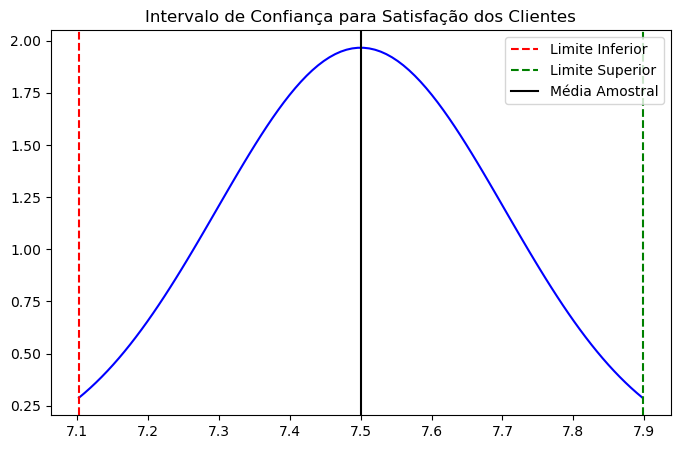

Intervalo de Confiança: (7.10, 7.90)


In [36]:
# Dados
media_amostral = 7.5
desvio_padrao = 1.2
n = 35
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_padrao / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(limite_inferior, limite_superior, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Satisfação dos Clientes")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

### **Conclusão**

A aplicação dos intervalos de confiança nos exemplos apresentados demonstra a importância dessa ferramenta na análise estatística. Ao estimar parâmetros populacionais com base em amostras, os intervalos permitem compreender a incerteza envolvida nas medições e tomar decisões mais embasadas.

Além disso, a representação gráfica dos intervalos facilita a interpretação dos resultados, tornando mais evidente a dispersão dos dados e o impacto do tamanho da amostra. A análise visual complementa os cálculos e auxilia na compreensão da variação estatística.

Por fim, o uso de ferramentas computacionais, como Python, destaca-se como um recurso essencial para a estatística aplicada. Automação de cálculos e visualização de dados proporcionam maior eficiência e precisão, permitindo que profissionais tomem decisões baseadas em evidências estatísticas sólidas.

---


### Aula 3

#### **Exercício 1: Avaliação da Qualidade de um Produto**

Uma fábrica de refrigerantes deseja estimar o teor médio de açúcar (em gramas) por lata. Foi coletada uma amostra aleatória de 30 latas, resultando em uma média de 35 gramas de açúcar, com um desvio padrão amostral de 3 gramas. Determine um intervalo de confiança de 95% para o teor médio de açúcar por lata. Represente a solução de forma gráfica.

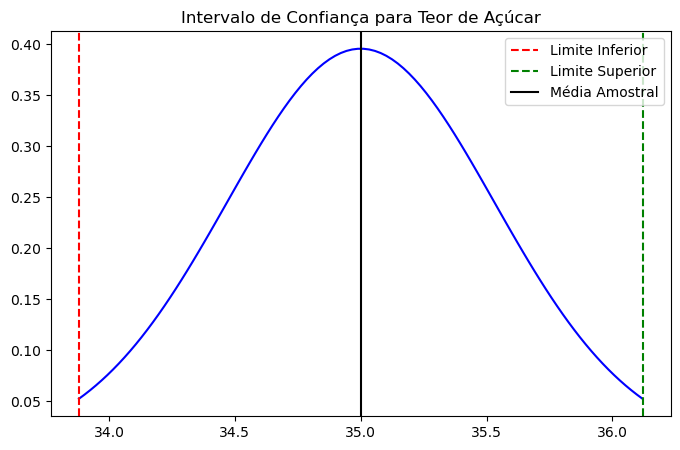

Intervalo de Confiança: (33.88, 36.12)


In [51]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Dados
media_amostral = 35
desvio_amostral = 3
n = 30
confianca = 0.95
t = stats.t.ppf((1 + confianca) / 2, df=n-1)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_amostral / np.sqrt(n)
limite_inferior = media_amostral - t * erro_padrao
limite_superior = media_amostral + t * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(limite_inferior, limite_superior, 100)
y = stats.t.pdf((x - media_amostral) / erro_padrao, df=n-1)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Teor de Açúcar")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### **Perguntas sobre o Exercício 1:**

1. **O que representa o intervalo de confiança encontrado?**

    - Resposta: Representa a faixa onde, com 95% de certeza, está o teor médio de açúcar por lata na população.

2. **Se a confiança fosse de 99%, como o intervalo mudaria?**

    - Resposta: O intervalo ficaria mais amplo, pois maior confiança exige maior margem de erro.

3. **Como o tamanho da amostra influencia o intervalo?**

    - Resposta: Quanto maior a amostra, menor o erro padrão, tornando o intervalo mais estreito.

4. **Por que usamos a distribuição t-Student?**

    - Resposta: Porque a amostra é pequena (n < 30) e a variância populacional é desconhecida.

5. **O que o desvio padrão indica neste contexto?**

    - Resposta: Representa a variabilidade do teor de açúcar entre as latas analisadas.

#### **Exercício 2: Tempo Médio de Atendimento em um Banco**

Um banco deseja estimar o tempo médio de espera dos clientes. Uma amostra de 50 clientes revelou um tempo médio de 20 minutos, com um desvio padrão populacional de 4 minutos. Determine um intervalo de confiança de 95% para o tempo médio de espera. Represente sua solução graficamente.

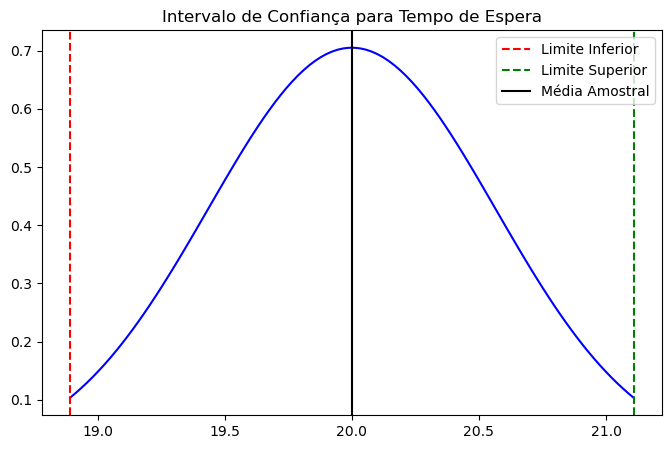

Intervalo de Confiança: (18.89, 21.11)


In [55]:
# Dados
media_amostral = 20
desvio_padrao = 4
n = 50
confianca = 0.95
z = stats.norm.ppf((1 + confianca) / 2)

# Cálculo do Intervalo de Confiança
erro_padrao = desvio_padrao / np.sqrt(n)
limite_inferior = media_amostral - z * erro_padrao
limite_superior = media_amostral + z * erro_padrao

# Gráfico
plt.figure(figsize=(8,5))
x = np.linspace(limite_inferior, limite_superior, 100)
y = stats.norm.pdf(x, media_amostral, erro_padrao)
plt.plot(x, y, color='blue')
plt.axvline(limite_inferior, color='red', linestyle='dashed', label='Limite Inferior')
plt.axvline(limite_superior, color='green', linestyle='dashed', label='Limite Superior')
plt.axvline(media_amostral, color='black', linestyle='solid', label='Média Amostral')
plt.legend()
plt.title("Intervalo de Confiança para Tempo de Espera")
plt.show()

print(f"Intervalo de Confiança: ({limite_inferior:.2f}, {limite_superior:.2f})")

#### Perguntas sobre o Exercício 2:

1. **Como interpretar o intervalo de confiança encontrado?**

    - Resposta: Com 95% de certeza, o tempo médio de espera na população está dentro desse intervalo.

2. **Por que utilizamos a distribuição normal neste caso?**

    - Resposta: Porque a amostra é grande (n > 30), permitindo o uso da aproximação normal.

3. **Se coletássemos uma amostra maior, o que aconteceria?**

    - Resposta: O intervalo ficaria menor, aumentando a precisão da estimativa.

4. **O que a margem de erro indica?**

    - Resposta: Representa a incerteza na estimativa do tempo médio de espera.

5. **O que significaria um intervalo de confiança mais estreito?**

    - Resposta: Significaria uma estimativa mais precisa do tempo médio de espera.